In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import os.path

from collections import namedtuple

import warnings
warnings.filterwarnings("ignore") 

%matplotlib inline

In [2]:
SecondHopSample = namedtuple("SecondHopSample", ("pid","time","min","avg","max"))

def gen_shs(filename):
    with open(filename) as ndj:
        for line in ndj: 
            j = json.loads(line)
            yield SecondHopSample(j['prb_id'],j['timestamp'],j['min'],j['avg'],j['max'])

In [14]:
df = pd.DataFrame(gen_shs("probe_second_hop_data/RIPE-Atlas-measurement-2-probe-10928.txt"))
df['time'] = pd.to_datetime(df['time'], unit="s")
df.index = df['time']
del(df['time'])

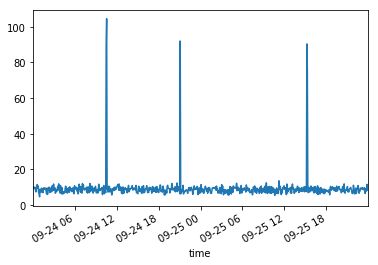

In [21]:
df['min'].plot()